# On ne veux pas de franges ici 

## On importe les donnés

**date = '?'**

**scans = np.array([?])**

**flag_ordi_isa , flag_ordi_guillaume_max , flag_ordi_machine = 0 , 0 , 1**


In [1]:
### Récupération des données - Copie les fichiers sur l'ordi d'Isa

from platform import python_version
print('Version de Python:', python_version())

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack         # FFT µ
from scipy.optimize import curve_fit
import os
import configparser 
#ConfigParser
import shutil
from scipy.io import loadmat
from scipy.signal import savgol_filter
from colour import Color
#from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from scipy.interpolate import interp1d
import math 

### Paramètres pour les tracés
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
})

################################
### Paramètres du scan
#date = '2024-04-24'
#scans = np.array([29])
#scans = np.array([89,97,102,108])
#scan=scans[0]

#date = '2024-03-15'
#scans = np.array([61])
#scan=scans[0]

###------------------------------
gain_ccd = 1.207   # Nombre de niveaux de gris par electrons
gain_ccd=1.0/1.207  # Nombre d'e- / (niveau de gris) --> vrai gain de la CCD, mais nous on utilise le gain en photons
pixelsize=1.75e-6   # Taille d'un pixel (m) 
pulselength=50e-6   # Durée du pulse d'imagerie
################################

plt.close('all')


flag_ordi_isa , flag_ordi_guillaume_max , flag_ordi_machine, flag_ordi_machine_2= 0 , 0 , 0, 1

### Lecture des paramètres
conf = configparser.ConfigParser()
if flag_ordi_isa : parfile='/mnt/data/DonneesEquipePuce/analysedata/analyses_jupyter/analyse_DR_2022/parameters.py'
elif flag_ordi_guillaume_max : parfile="/Users/themezeguillaume/Documents/Ordi_Isa/Donnees/parameters.py"
elif flag_ordi_machine : parfile = "/home/isabellebouchoule/Puce/analysedata/analyses_jupyter/analyse_DR_2022/parameters.py"
elif flag_ordi_machine_2 : parfile = "/home/isabelle.bouchoule/Puce/analysedata/analyses_jupyter/analyse_DR_2022/parameters.py"

conf.read(parfile)

### Constantes
#pixelsize   =   float(conf.get('constants','pixelsize')) # in m
pixelsize = 1.77e-6
gain_ccd    =   float(conf.get('constants','gain_ccd'))  #Nombre d'électrons/(niveau de gris) ???
gain_ccd=1.1/1.207  # Nombre d'e- / (niveau de gris) --> vrai gain de la CCD, mais nous on utilise le gain en photons
offset      =   float(conf.get('constants','offset'))
wavelength  =   float(conf.get('constants','wavelength')) #in m
c           =   float(conf.get('constants','c'))
m = 86.9091 * 1.660539e-27   # mass Rubidium 87
k_B = 1.3806e-23


### Constantes déduites
sigma0 = 3*wavelength**2/(2*np.pi)
k_wavelength = 2*np.pi/wavelength
omega = 2*np.pi*c/wavelength
hbar  = 1.05e-34
Gamma = 2*np.pi*6.0666*1e6
I_sat = 2*np.pi**2*hbar*Gamma*c/(3*wavelength**3)
print('\nIsat=', I_sat)

### Ecrit dans le fichier de conf
conf.set('general', 'date', date)
conf.set('general', 'scans', str(scans[0]))
conf.set('general','gain_ccd',str(gain_ccd))
conf.set('general','offset',str(offset))
conf.set('general','pixelsize',str(pixelsize))
conf.set('general','pulselength',str(pulselength))
conf.set('constants','gain_ccd',str(gain_ccd))
conf.set('constants','offset',str(offset))
with open(parfile, 'w') as configfile:
    conf.write(configfile)
    

### Recupère les données sur le disque dur de l'ordi d'Isa
dest = {}
dirordimanip ={}
listefich = {}
lesfich = {}

flag_ordi_isa = False 
flag_ordi_guillaume_max = False 
flag_ordi_machine = True

for h in range(len(scans)):
    ind_scan = str(scans[h])
    if flag_ordi_isa : 
        debut_dest = '/mnt/data/DonneesEquipePuce/analysedata/'
        debut_diro = "/media/pucemanip/manip/data/"
    elif flag_ordi_guillaume_max : 
        debut_dest = '/Users/themezeguillaume/Documents/Ordi_Isa/Donnees/mnt/'
        debut_diro = "/Users/themezeguillaume/Documents/Ordi_Isa/Donnees/media/"
    elif flag_ordi_machine : 
        debut_dest = "/home/isabelle.bouchoule/Puce/analysedata/"
        debut_diro = "/media/pucemanip/manip/data/"
    
    dest[ind_scan]= debut_dest +date+'/scan'+str(scans[h]).zfill(3)+'/'
    if (~os.path.isdir(debut_dest+date)!=-2):
        os.system('mkdir ' + debut_dest+date)
    if (~os.path.isdir(dest[ind_scan])!=-2):
        os.system('mkdir '+dest[ind_scan])
        
       
    dirordimanip[ind_scan]= debut_diro +date+'/scan'+str(scans[h]).zfill(3)+'/'
    #dirordimanip[ind_scan]='/Users/themezeguillaume/Documents/Ordi_Isa/Donnees/media/scan'+str(scans[h]).zfill(3)+'/'
    listefich[ind_scan]=os.listdir(dirordimanip[ind_scan])

    lesfich[ind_scan]=[]
    for file in listefich[ind_scan]:
            if file.endswith(".mat"):
                lesfich[ind_scan].append(file)
                shutil.copyfile(dirordimanip[ind_scan]+file, dest[ind_scan]+file)

    print('\n',lesfich[ind_scan])            

    conf.set('general', 'dest',dest[ind_scan])
    with open(parfile, 'w') as configfile:
        conf.write(configfile)

Version de Python: 3.10.12



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/isabelle.bouchoule/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/isabelle.bouchoule/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/isabelle.bouc

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [5]:
### Définition des zones, récupération gain et speed

# Récupération de la première image du nuage
rep=debut_dest+date+'/scan'+str(scans[0]).zfill(3)+'/' 
print ( rep )
fich=lesfich[str(scans[0])][0]

mat = scipy.io.loadmat(rep+fich)
all_selec = np.array([ [0, 0],[850, 250] ])   # Sélectionne toute la fenêtre

######################################################
# Zone de sélection des atomes
atoms_selec = np.squeeze(mat['parselec'])[0] 
atoms_selec = np.array([[10, 140],[850, 175] ])
# atoms_selec = np.array([[200, 135],[550, 175] ])

# Zone de sélection du background
background_selec = np.uint16(np.squeeze(mat['parselec'])[1])
background_selec = np.array([[550, 175],[650, 185] ])
######################################################

name=dirordimanip[str(scans[0])]+'scan'+str(scans[0]).zfill(3)
data = np.genfromtxt(name+'res.dat',dtype=None, encoding=None)
len_scan = len(lesfich[str(scans[0])])

print("Sélection des atomes :",'[',atoms_selec[0], atoms_selec[1],']')
print("Sélection du background :", '[',background_selec[0], background_selec[1], ']')
print("\nGain CCD:", gain_ccd)

/home/isabellebouchoule/Puce/analysedata/2024-04-24/scan089/
Sélection des atomes : [ [ 10 140] [850 175] ]
Sélection du background : [ [550 175] [650 185] ]

Gain CCD: 0.9113504556752279


In [6]:
def lire_fichier_et_traiter(name):
    # Ouvrir le fichier en mode lecture
    with open(name + 'res.dat', 'r') as fichier:
        lignes = fichier.readlines()  # Lire toutes les lignes du fichier
    
    # Ignorer la dernière ligne
    lignes_new = lignes[:]
    
    # Initialiser une liste pour stocker les lignes traitées
    lignes_traitees = []
    
    print ( len(lignes_new))
    
    # Parcourir chaque ligne de lignes_new
    for ligne in lignes_new:
        # Supprimer les sauts de ligne indésirables et séparer les éléments par espace
        elements = ligne.strip().split()
        
        # Si c'est la première ligne, obtenir le nombre de colonnes attendu
        if len(lignes_traitees) == 0:
            nombre_colonnes_attendu = len(elements)
        
        # Si le nombre d'éléments est inférieur au nombre de colonnes attendu
        if len(elements) < nombre_colonnes_attendu:
            # Compléter la ligne avec des zéros
            elements += ['0'] * (nombre_colonnes_attendu - len(elements))
        
        # Ajouter la ligne traitée à la liste
        lignes_traitees.append(elements)
    
    # Charger les données traitées dans un tableau NumPy
    data = np.array(lignes_traitees, dtype=None)
    
    return data

In [7]:
# Ancien version 

import numpy as np

# Initialize dictionaries and arrays to store data
len_scan = {}  # Stores the length of each scan
data_param = {}
data_param_sets = {}  # Stores unique values of param_scan_n for each scan and parameter

#print (sorted(data[0]))
#param_names = ['X1_bis', "DeadtimeDMD_bis","Width1_bis", "DeadtimeDMD",'Width1','delta','RFfreqACfinexp',"Ismalldprquartic","Ismalldquartic","BxMOT"]  # List of parameter names
#param_names = ["BxMOT",'Width1',"DeadtimeDMD","Width1_bis","DeadtimeDMD_bis"]  # List of parameter names
#param_names = ['delta']
#param_names = ["DeadtimeDMD","BxMOT","poscam","Width1" ]

offset = 628  # An offset value

for i , param_name in enumerate(param_names):
    globals()[f"data_param_{i}"] = {}
    globals()[f"data_param_set_{i}"] = np.array([])

# Loop through a list of scans
for scan_number in scans:  # Make sure 'scans' is correctly defined
    # Construct the filename for the current scan
    name = dirordimanip[str(scan_number)] + 'scan' + str(scan_number).zfill(3)
    
    # Read data from the file and store it in the 'data' variable
    data = lire_fichier_et_traiter(name)
    #data = np.genfromtxt(name + 'res.dat', dtype=None, encoding=None)
    
    #print(name + 'res.dat')
    
    # Store the length of the current scan
    len_scan[scan_number] = len(lesfich[str(scan_number)])
    
    # Extract data related to param_scan_1 and store it in the dictionary
    

    if scan_number not in data_param_sets:
        data_param[scan_number] = {}
        data_param_sets[scan_number] = {}  # Initialize data_param_sets for the scan
    
    # Extract and store data related to each parameter
    for i , param_name in enumerate(param_names):
        globals()[f"ind_param_{i}"] = 0 
        while data[0][globals()[f"ind_param_{i}"]] != param_name:
            globals()[f"ind_param_{i}"]+= 1
            if globals()[f"ind_param_{i}"] >= len(data[0]):
                print(f"ind_param_{i} = {globals()[f'ind_param_{i}']} >= {len(data[0])} = len(data[0])")
                print(f"{param_name} n'est pas dans data[0] = {data[0]}")

        globals()[f"data_param_{i}"][scan_number] = np.transpose(data)[globals()[f"ind_param_{i}"]]   # Texpansion pour chacun des scans
        globals()[f"data_param_set_{i}"] = np.append(globals()[f"data_param_set_{i}"],list(set(np.delete(globals()[f"data_param_{i}"][scan_number],0))))
            
        data_list = list(set(np.delete(np.transpose(data)[globals()[f"ind_param_{i}"]], 0)))  # Convert the result to a list
        data_param_sets[scan_number][param_name] = np.array(data_list, dtype=np.float64)  # Convert the list to a NumPy array
        data_param[scan_number][param_name] = np.transpose(data)[globals()[f"ind_param_{i}"]]

for i , param_name in enumerate(param_names):
    globals()[f"data_param_set_{i}"] = globals()[f"data_param_set_{i}"].astype(np.float64)
    globals()[f"data_param_set_{i}"] = np.unique(globals()[f"data_param_set_{i}"]) 
           
        
        
# Print the unique sets of values for each parameter for each scan
print("_______________________________")
#for scan_number in scans:for param_name in param_names:print(f"Scan {scan_number} - Ensemble des {param_name}: {data_param_sets[scan_number][param_name]}")

print("_______________________________")

#for i , param_name in enumerate(param_names):print(f"Ensemble des {param_name}:" , globals()[f"data_param_set_{i}"])

#print (data_param_sets)
#print(data_param)


NameError: name 'param_names' is not defined

In [10]:
### data_par_scan['ind_scan']['repertoire']['nom_parametre'] = valeur_parametre 

import scipy as sp
data_par_scan = {}
for ind_scan , liste_fichier in lesfich.items() :
    data_par_fichier = {}
    for fichier0 in liste_fichier :
        fichier = dirordimanip[ind_scan]+fichier0
        res = sp.io.loadmat(fichier)
        lesparams = res['gusparam'][0]
        data_fichier = {}   
        for i in range ( int(len(lesparams)/2)) :
            data_fichier[lesparams[2*i][0]] = lesparams[2*i + 1][0][0]
        data_par_fichier[fichier] = data_fichier
    data_par_scan[ind_scan] = data_par_fichier


In [11]:
### data_liste_valeurs_par_scan_par_parametre['nom_parametre']['ind_scan'] = [liste valeur_parametre pour ce scan]

def valeurs_repertoire(data , parametre ) :
    if parametre in list(data.keys()) : return data[parametre]
    #else :
    #    print(f'Pas de {parametre} dans {repertoire} ou déjà dans la liste ')
    return False 

def liste_valeurs_scan(data, parametre):
    liste = []
    for repertoire , les_parametres in data.items() :
        valeur = valeurs_repertoire(les_parametres , parametre )
        if valeur != False and valeur not in liste : liste.append(valeur)
    return liste

def dic_valeurs_par_scan(data , parametre ) :
    dic = {}
    for ind_scan , data_par_repertoires in data.items():
        dic[ind_scan] = liste_valeurs_scan(data_par_repertoires, parametre)
    return dic

data_liste_valeurs_par_scan_par_parametre = {}
for parametre in param_names : data_liste_valeurs_par_scan_par_parametre[parametre] = dic_valeurs_par_scan(data_par_scan , parametre )
#for parametre, dic_ind_scan in data_liste_valeurs_par_scan_par_parametre.items():for ind_scan , liste in dic_ind_scan.items():print(f"{ind_scan} , {parametre} : " , liste )
        

NameError: name 'param_names' is not defined

In [12]:
# data_liste_valeurs_par_parametre['nom_parametre'] = [liste de valeur_parametre pour tous les scan]

def liste_valeurs(data , parametre ) :
    liste = []
    for ind_scan , data_par_repertoires in data.items():
        for repertoire , les_parametres in data_par_repertoires.items() :
            if parametre in list(les_parametres.keys()) and les_parametres[parametre] not in liste :
                liste.append(les_parametres[parametre])
            #else :
            #    print(f'Pas de {parametre} dans {repertoire} ou déjà dans la liste ')
    return liste 

data_liste_valeurs_par_parametre = {}
for parametre in param_names : data_liste_valeurs_par_parametre[parametre] = liste_valeurs(data_par_scan , parametre )
for parametre, liste in data_liste_valeurs_par_parametre.items():print (f'Nom parametre : {parametre} :' , liste)
    
# ça ne sers à rien de savoir le scan 
# data_par_repertoire['repertoire']['nom_parametre']= valeur_parametre 

data_par_repertoire = {}
for int_scan , dic_repertoire in data_par_scan.items():
    for repertoire , les_parametres in dic_repertoire.items():
        data_par_repertoire[repertoire] = les_parametres
        
def coinside_repertoire_parametre_valeur(repertoire, parametre, valeur): 
    if parametre in data_par_repertoire[repertoire]: return data_par_repertoire[repertoire][parametre] == valeur
    else : return False
    
def coinside_repertoire_parametres_valeurs(repertoire, parametres, valeurs):
    assert len(parametres) == len(valeurs)
    for i in range(len(parametres)) : 
        if not coinside_repertoire_parametre_valeur(repertoire, parametres[i], valeurs[i]) : 
            return False
    return True 
        
    
#data_par_repertoire['(tuple valeurs des parametres)']= [liste des repertoire corspondant au tuple des parametres]   

dic_par_parametres = {}

def func_dic_par_parametres(n,current_index=0):
    ''' cette fonction construit dic_par_parametre avec une keys les valetres des parametres , est la valeurs une luste des repertoire corespondant'''
    
    # au bout de l'arbre 
    if current_index == n : # Condition d'arret de la récurence
        valeur_parametres = [float(globals()[f"param_{i}"]) for i in range(n)]
        liste_repertoires = [repertoire for repertoire in globals()[f"liste_repertoires"] 
             if coinside_repertoire_parametres_valeurs(repertoire, param_names, valeur_parametres)  ]
        if len(liste_repertoires) != 0 :  dic_par_parametres[tuple(valeur_parametres)] = liste_repertoires
            
        return 
    
    # à la racine :
    if current_index == 0 : 
        globals()[f"valeurs_parametres"] = []
        globals()[f"liste_repertoires"] = list(data_par_repertoire.keys()).copy()
        #print (  globals()[f"liste_repertoires"])

    
    # Pour tous les valeure posible pour un paramtres
    for globals()[f"h_{current_index}"] , globals()[f"param_{current_index}"] in enumerate(data_liste_valeurs_par_parametre[param_names[current_index]]) : 
        func_dic_par_parametres(n,current_index+1)
        
func_dic_par_parametres(len(param_names))

#print(dic_par_parametres.keys())
s = 0 
for valeurs_parametres , liste_repertoire in dic_par_parametres.items():
    #print(valeurs_parametres , len(liste_repertoire))
    s += len(liste_repertoire)

# verification que l'on a bien ranger tous les imames 
#print(len(list(data_par_repertoire.keys())) , s )

NameError: name 'param_names' is not defined

In [13]:
%%time

##################
j_start = 1
g_exemple = 0
h_exemple = 0
N_at_min =0               # On enlève les images avec trop peu d'atomes (si not flag_photons)
N_at_max =2e5 #np.inf #15000      # On enlève les images avec trop d'atomes
N_ph_min = -1000             # On enlève les images avec trop peu de photons (si flag_photons)
N_ph_max = 3000              # On enlève les images avec trop de photons 
N_ph_max_real = 400
lim_background = 250
sat_limite = 9e-2            # Saturation en dessous de laquelle on ne prends pas l'image 
excluded=0
excluded_ph=0
#------------------
#date_rep = "2023_10-02"      # Là où on enregistre les fichiers si flag_save
#param2_save = "2598.0"
#------------------
flag_plot_all =1
flag_plot_exemple=0
flag_param = 0
flag_offset= 0              # Pour remesurer l'offset (approximatif car photons présents)
flag_save = 0              # Pour sauver tous les params 1 mais un seul param 2 (sauf si save_all_params)
flag_save_all_params = 0    # Pour sauver tous les params 1 et tous les params 2
flag_background = 0         # On récupère les images sans atomes pour en extraire un background
flag_plot_GIF = 0
falg_save_GIF = 0
#------------------
flag_photons = 0            # si 1 on regarde les photons collectés, si 0 on mesure le nombre d'atomes
##################

N_ats_profils = {}
N_tots = {}
N_phs_profils = {}
N_ph_tots = {}
N_tots_all = np.array([])
N_ph_tots_all = np.array([])
background_array = np.array([])      # On récupère les images sans atomes pour en extraire un background



CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 50.1 µs


In [14]:
# Ancien version , les parametres ne sont pas avec le flux d'image 

for i in range(len(param_names)) : 
    globals()[f"params_{i}"] = np.array([])
    #data_param_sets[scan_number][param_names[i]]

print ('-----')
#for i in range(len(param_names)) : print ( globals()[f"params_{i}"])
print('----')

j_start, N_scans_rm_end = 1 , 0 



""" Dans ce dictionnaire les fichier sont ranger avec fonction des paramètres 
(param_0 , param_2, ... ,  param_{n-1} ) : [list des fichiers corespondants]
"""
dict_donnees_renger = {}


def donnees_renger(n,current_index=0):
    if current_index == n : # Condition d'arret de la récurence
        #for i in range(len(param_names)) : print(globals()[f"params_{i}"])
        for i in range(n) : print ( f"param_{i} :  " , globals()[f"param_{i}"])
        print ( ' ------ ')
        
                
        """ Permer des constrire dict_donnees_renger[(param_0 , param_2, ... ,  param_{n-1} )]"""
        def donnees_renger_p() :
            
            liste_fichiers = []
    
            for i, scan in enumerate(scans):                          # Pour chaque scan
                print (scan)
                for j in range(j_start,len_scan[scan]+1-N_scans_rm_end):      # Sur toutes les réalisations d'un scan

                    def param_coincident():
                        # Si les paramètres coïncident
                        out = 1
                        for ip, param_name in enumerate(param_names) :
                            out = out* ( float(globals()[f"data_param_{ip}"][scan][j]) == globals()[f"param_{ip}"])
                            
                        return out

                    if param_coincident() :
                        
                        #for ip, param_name in enumerate(param_names) :print (float(globals()[f"data_param_{ip}"][scan][j]) , globals()[f"param_{ip}"]  )
                        

                        fichier = dirordimanip[str(scan)]+lesfich[str(scan)][j-1]
                        #print ( fichier)
                        
                        liste_fichiers.append(fichier)

                        #mat = scipy.io.loadmat(dirordimanip[str(scan)]+lesfich[str(scan)][j-1])
            
            liste_key = [float(globals()[f"param_{i}"]) for i in range(len(param_names))]
            dict_donnees_renger[tuple(liste_key)]  = liste_fichiers
            
        donnees_renger_p()
        liste_key = [float(globals()[f"param_{i}"]) for i in range(len(param_names))]
        print ( 'key' , liste_key )
        print ( dict_donnees_renger[tuple(liste_key)])
                   
        return

    #liste_para = list(data_param_sets[scan_number].keys())    
    #for globals()[f"h_{current_index}"] in range(len(data_param_sets[scan_number][liste_para[current_index]])):
    for globals()[f"h_{current_index}"] , globals()[f"param_{current_index}"] in enumerate(globals()[f"data_param_set_{current_index}"]) : 
        #print (f"h_{current_index} = ", globals()[f"h_{current_index}"])
        #globals()[f"param_{current_index}"] = data_param_sets[scan_number][param_names[current_index]][globals()[f"h_{current_index}"]]
        globals()[f"params_{current_index}"] = np.append(globals()[f"params_{current_index}"],globals()[f"param_{current_index}"])
        donnees_renger(n,current_index+1)
        
#donnees_renger(len(param_names),0)

print ('-----')
#for i in range(len(param_names)) : print ( globals()[f"params_{i}"])
print('----')

#print (dict_donnees_renger.keys())

NameError: name 'param_names' is not defined

In [15]:
# Il faut refaire tous la suite avec dic_par_parametres mais pour l'instant
dict_donnees_renger = dic_par_parametres

NameError: name 'dic_par_parametres' is not defined

In [16]:
# encore un verification que les repertoires sont bien rangés

liste_keys = dict_donnees_renger.keys()
#print(liste_keys)
for parametres in liste_keys:
    
    test = ''
    for i in range(len(param_names)):
        test += param_names[i] + ' : ' + str(parametres[i]) + ' ; '
    #print ( test , parametres , len(dict_donnees_renger[parametres]))

NameError: name 'dict_donnees_renger' is not defined

In [17]:
''' zone d' analyse '''

# la zone du DMD sur l'image Fluos 
atx1 , atx2 = 100 , 800 
aty1 , aty2 = 125 , 200
bkx1 , bkx2 = atx1 , atx2
bky1 , bky2 = aty1-10 , aty1
atoms_selec_x1 , background_selec_x1  = np.array ( [ np.array ([ atx1 , aty1 ]) , np.array([atx2 , aty2 ])]) , np.array ( [ np.array ([ bkx1 , bky1 ]) , np.array([bkx2 , bky2 ])])
atoms_selec_x , background_selec_x = atoms_selec_x1 , background_selec_x1


# la zone de l'analise transverse sur les images Fluos 
#atx1 , atx2 = 300 , 355
#aty1 , aty2 = 70 , 110
#bkx1 , bkx2 = 0 , atx1# atx1 , atx2 #0 , atx2
#bky1 , bky2 = aty1 , aty2# , aty1 #aty1 , aty2 #70 , 130
atoms_selec_y1 , background_selec_y1  = np.array ( [ np.array ([ atx1 , aty1 ]) , np.array([atx2 , aty2 ])]) , np.array ( [ np.array ([ bkx1 , bky1 ]) , np.array([bkx2 , bky2 ])])

atoms_selec_y , background_selec_y = atoms_selec_y1 , background_selec_y1


In [18]:
def creer_dossier(nom_dossier):
    import os
    """
    Vérifie si un dossier existe à l'emplacement spécifié et le crée s'il n'existe pas.

    Args:
        nom_dossier (str): Le nom du dossier à créer.

    Returns:
        str: Un message indiquant si le dossier a été créé avec succès ou s'il existe déjà.
    """
    # Vérifiez si le dossier n'existe pas déjà
    if not os.path.exists(nom_dossier):
        # Créez le dossier
        os.makedirs(nom_dossier)
        return f"Le dossier '{nom_dossier}' a été créé avec succès."
    else:
        return f"Le dossier '{nom_dossier}' existe déjà."

In [19]:
date_rep = date#"2024_04_24" 

creer_dossier(date_rep) 

offset = 595
print ( 'offset = ', offset)

def plot_fichier(fichier):
    mat = scipy.io.loadmat(fichier)
    pic2double=np.double(mat['pic2'] - offset)
    pic2double[pic2double<1]=1
    pic1double=np.double(mat['pic1'] - offset)
    pic1double[pic1double<1]=1
    if 0 :
        plt.figure()
        plt.pcolormesh(pic2double, cmap = "jet")
        plt.xticks(fontsize =14)
        plt.yticks(fontsize = 14)
        plt.colorbar()
        plt.show()
        plt.figure()
        plt.pcolormesh(pic1double, cmap = "jet")
        plt.xticks(fontsize =14)
        plt.yticks(fontsize = 14)
        plt.colorbar()
        plt.show()
    pic =  np.rot90(np.log(pic2double/pic1double ))
    plt.pcolormesh(pic, vmin = -0.05, vmax = 0.8, cmap = "jet")
    plt.colorbar()
    plt.show()
#print (dict_donnees_renger[(1.0, 70.0)] )

#plot_fichier(dict_donnees_renger[(50.0, 0.0)][0])

#for fichier in dict_donnees_renger[(50.0, 70.0)]:plot_fichier(fichier)

def modif_pic1(pic):
    '''fonction pour modifier pic1'''
    #profil ( np.rot90(pic), atoms_selec_x , background_selec_x , atoms_selec_y , background_selec_y , atoms_selec_y , background_selec_y)
    pic[pic<1]=1
    return pic

def modif_pic2(pic):
    '''fonction pour modifier pic2'''
    pic[pic<1]=1
    return pic

def pic_ficher(fichier):
    mat = scipy.io.loadmat(fichier)
    
    #calcul_offset =np.rot90((np.double(mat['pic2']))) 
    #calcul_offset =calcul_offset[ bky1 : bky2 , bkx1 : bkx2 ]  
    #new_offset = np.mean(calcul_offset)
    
    #print ("new_offset : " , new_offset)
    
    pic2double=np.double(mat['pic2'] - offset)
    pic1double=np.double(mat['pic1'] - offset)
    
    
    
    pic1double = modif_pic1(pic1double)
    pic2double = modif_pic2(pic2double)
    
    pic = np.rot90(np.log(pic2double/pic1double ))
    
    aux=np.rot90(gain_ccd*(pic2double))       
    aux2=aux#[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]    
    I = aux2*hbar*omega/(pixelsize**2 *pulselength)
    sat = I/I_sat
    sigma = sigma0/(1.+sat)
    
    N_at = pixelsize**2/sigma *pic#[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]] 
    
    return N_at

def liste_donnee_pic ( liste_fichier ) : return np.array([pic_ficher(fichier) for fichier in liste_fichier])

def moyenne_liste (liste) : return np.nanmean(liste , axis = 0 )

def moyenne_liste_fichier ( liste_fichier ) : return moyenne_liste (liste_donnee_pic ( liste_fichier ))

%run Analyse-Exp-fonctions-generales.ipynb

%run Analyse_Exp_fonctions_plot.ipynb

def f_profil_x ( tableau , atoms_selec , background_selec ) :
    background = np.mean(tableau[background_selec[0,1]:background_selec[1,1],background_selec[0,0]:background_selec[1,0]])    
    profil = np.sum ( tableau [atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]-background , axis = 0 ) 
    return ( profil) 

#profil_x_0  , profil_y_0 = profil ( moyenne_liste_fichier ( dict_donnees_renger[(1, 70.0)] ) , atoms_selec_x , background_selec_x , atoms_selec_y , background_selec_y , atoms_selec_y , background_selec_y)

NAT = []
X_NAT = []
liste_keys = dict_donnees_renger.keys()
for parametres in liste_keys:
    print (parametres , dict_donnees_renger[parametres])
    if len(dict_donnees_renger[parametres])>0 :
        
        #for fichier in dict_donnees_renger[parametres] : profil_x_0  , profil_y_0 = profil ( pic_ficher(fichier) , atoms_selec_x , background_selec_x , atoms_selec_y , background_selec_y , atoms_selec_y , background_selec_y)

        test = ''
        for i in range(len(param_names)): test += param_names[i] + ' : ' + str(parametres[i]) + ' ; '
        print ( 'para' , test , parametres , len(dict_donnees_renger[parametres]))
        
        profil_x_0  , profil_y_0 = profil ( moyenne_liste_fichier ( dict_donnees_renger[parametres] ) , atoms_selec_x , background_selec_x , atoms_selec_y , background_selec_y , atoms_selec_y , background_selec_y)

        import matplotlib
        
        matplotlib.rcParams['font.size'] = 8.0

        fig, axs = plt.subplots(2, 2)
        
        coordonne_x = np.arange( atx1 , atx2 )*pixelsize*1e6
        
        moyenne = np.nanmean(np.array([pic_ficher(fichier) for fichier in dict_donnees_renger[parametres] ]) , axis = 0 )
        
        axs[0, 0].plot(coordonne_x , f_profil_x ( moyenne , atoms_selec_x , background_selec_x )/(pixelsize*1e6*0.75))
        axs[0, 0].set_title("Profil moyen (ax[0, 0])")
        axs[0, 0].set_xlabel(r"$\mu m$") 
        
        moyenne2 = np.nanmean((np.array([pic_ficher(fichier) for fichier in dict_donnees_renger[parametres] ])- moyenne )**2 , axis = 0 )
        
        axs[0, 1].plot(coordonne_x , f_profil_x (  moyenne2 , atoms_selec_x , background_selec_x )/(pixelsize*1e6*0.75))
        axs[0, 1].set_title("Variance ou écart-type (ax[0, 1])")
        axs[0, 1].set_xlabel(r"$\mu m$") 
        
        moyenne_rfft2 = np.nanmean(np.array([np.fft.rfft2(pic_ficher(fichier)) for fichier in dict_donnees_renger[parametres] ]) , axis = 0 )
        
        axs[1, 0].plot(f_profil_x ( moyenne_rfft2 , atoms_selec_x , background_selec_x ))
        axs[1, 0].set_title("FFT Moyenne (ax[1, 0])")
        
        moyenne2_rfft2 = np.nanmean((np.array([np.fft.rfft2(pic_ficher(fichier)) for fichier in dict_donnees_renger[parametres] ])- moyenne_rfft2 )**2 , axis = 0 )

        axs[1, 1].plot(f_profil_x ( moyenne2_rfft2 , atoms_selec_x , background_selec_x ))
        axs[1, 1].set_title("Variance FFT (ax[1, 1])")
        
        NAT.append(np.sum(f_profil_x ( moyenne , atoms_selec_x , background_selec_x )))
        X_NAT.append(parametres[0])
        textsave = str(date_rep)+"/X_1D_Scan_"+str(scan)+'_'
        for i in range(len(param_names)):
            textsave += param_names[i] + '-' + str(parametres[i]) + '_'
        textsave += ".txt"
        
        np.savetxt(textsave,coordonne_x)
        
        textsave = str(date_rep)+"/Y_1D_Scan_"+str(scan)+'_'
        for i in range(len(param_names)):
            textsave += param_names[i] + '-' + str(parametres[i]) + '_'
        textsave += ".txt"
        
        np.savetxt(textsave, f_profil_x ( moyenne , atoms_selec_x , background_selec_x )/(pixelsize*1e6*0.75))



        plt.show()
        
plt.plot(X_NAT, NAT)
plt.ylabel('Nombre atome')
plt.xlabel(param_names[0])
plt.show()

offset =  595


NameError: name 'dict_donnees_renger' is not defined

In [20]:

def f_repertoire_profil(parametre):
    textsave_y = str(date_rep)+"/Y_1D_Scan_"+str(scan)+'_'
    textsave_x = str(date_rep)+"/X_1D_Scan_"+str(scan)+'_'
    label = ''
    for i in range(len(param_names)):
        textsave_x += param_names[i] + '-' + str(parametre[i]) + '_'
        textsave_y += f"{param_names[i]}-{parametre[i]}_"
        label += f'; {param_names[i]} : {parametre[i]}'
    textsave_x += ".txt"
    textsave_y += ".txt"
    print(textsave_y)
    return [np.genfromtxt(textsave_x),np.genfromtxt(textsave_y),label]
PROFILS = [f_repertoire_profil(parametre) for parametre in dict_donnees_renger.keys()]
    
for profil in PROFILS :
    X , Y , label = profil
    plt.plot(X,Y , label = label )
plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()   


 

NameError: name 'dict_donnees_renger' is not defined

In [21]:
print ( 'la')

la


/tmp/ipykernel_2047721/1054995873.py:22: RuntimeWarning: invalid value encountered in sqrt
  racine[0] ,racine[1] ,racine[2],  racine[-1] = -np.sqrt(xplus),-np.sqrt(xmoins), np.sqrt(xmoins), np.sqrt(xplus)


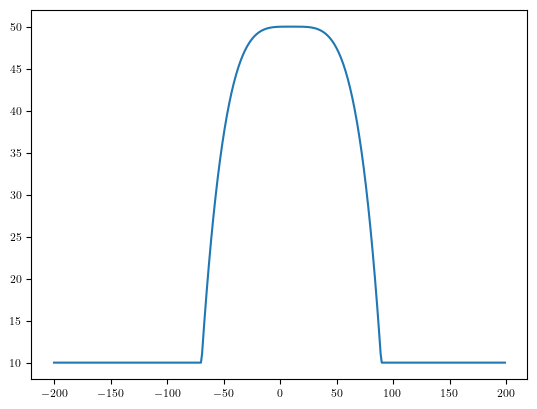

chi carre =  21.70307184613142
2.4163556e-316 -5.659091449810737e-08
809.775
Taille bord 288.51


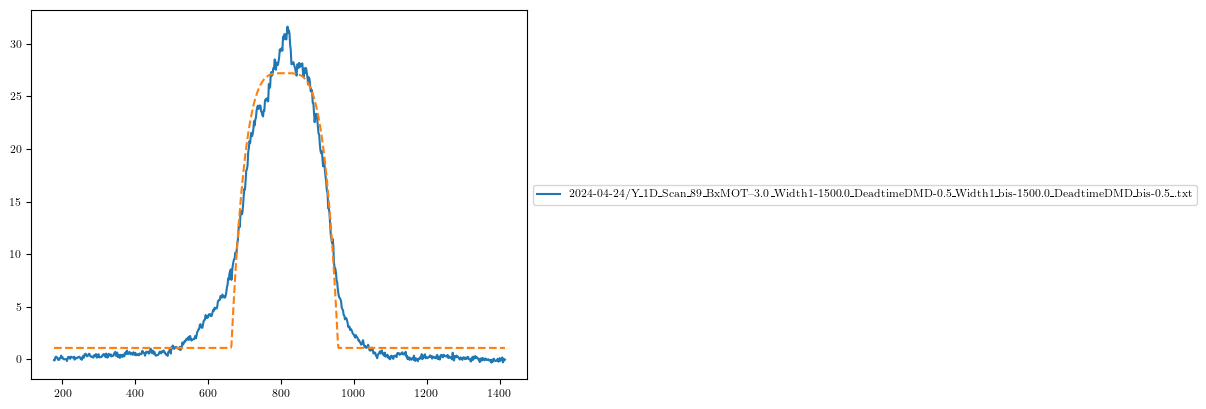

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


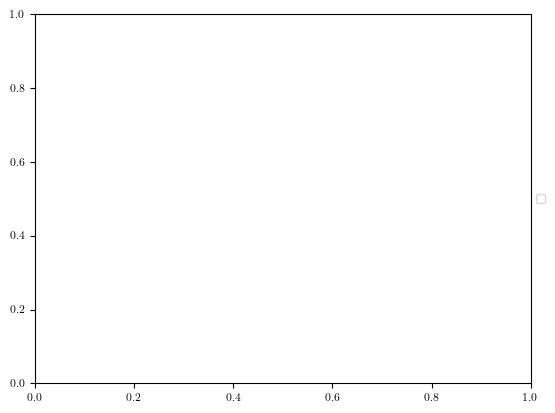

chi carre =  22.23954670860054
4.108423397145258e-174 -1.0797308758105905e-07
791.19
Taille bord 244.2600000000001


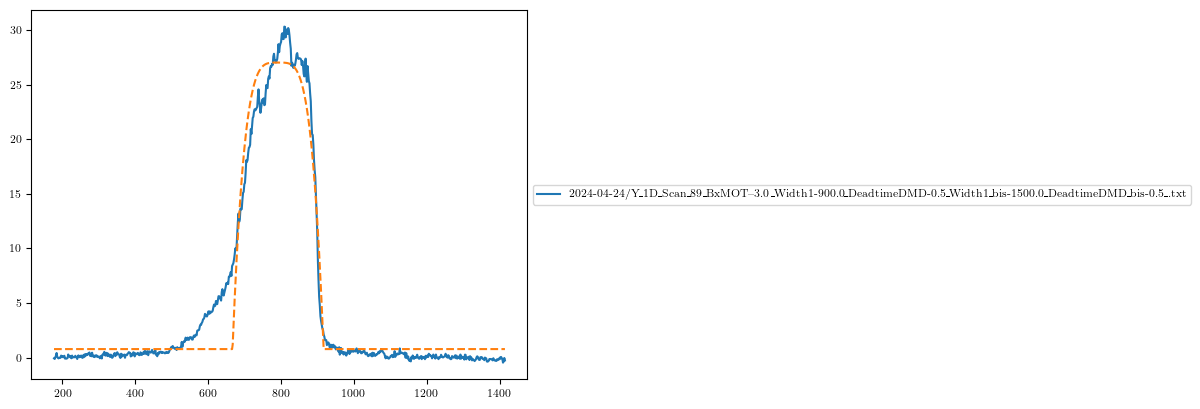

chi carre =  29.629998963723725
9.999997713175745e-08 -3.1379517107667915e-08
785.8799999999999
Taille bord 300.9


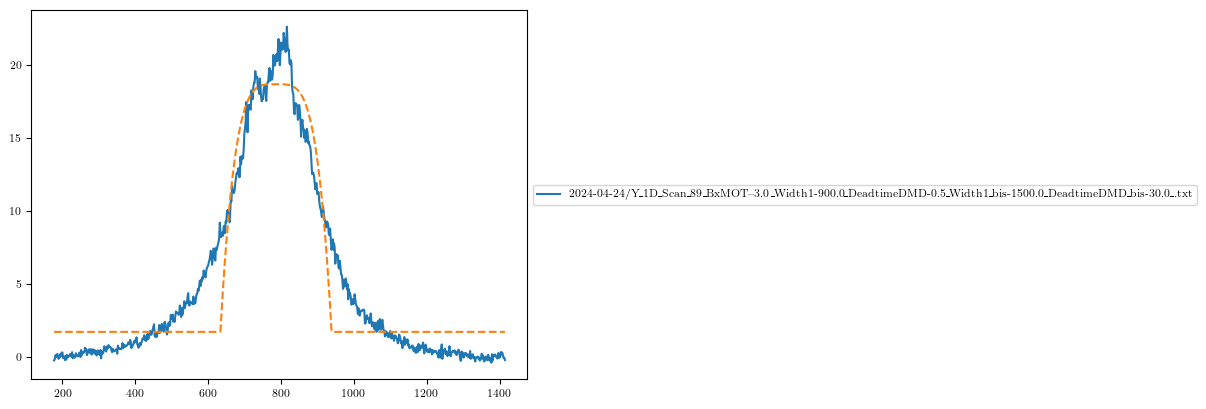

chi carre =  3.8162758482519066
9.881945081623496e-08 -3.3456199045309553e-09
846.06
Taille bord 279.65999999999985


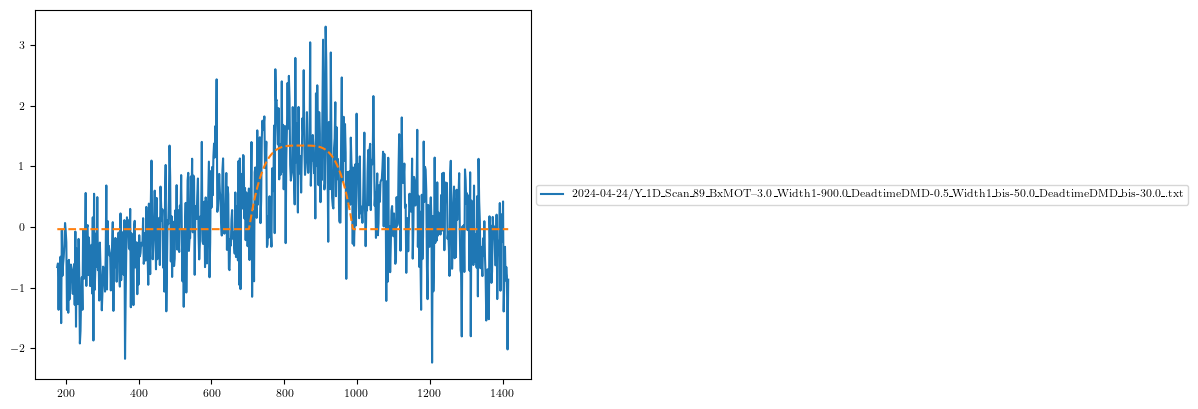

chi carre =  23.99855461954638
1.5495761011030752e-43 -5.6118268918076756e-08
784.9950000000001
Taille bord 274.35


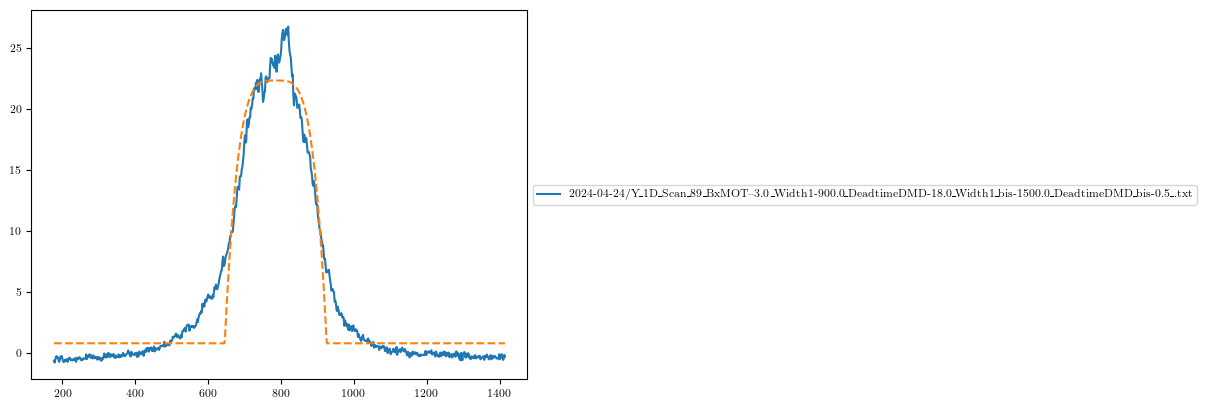

chi carre =  33.470111304717655
9.999999999681912e-08 -1.6097804713869627e-08
792.075
Taille bord 334.5300000000001


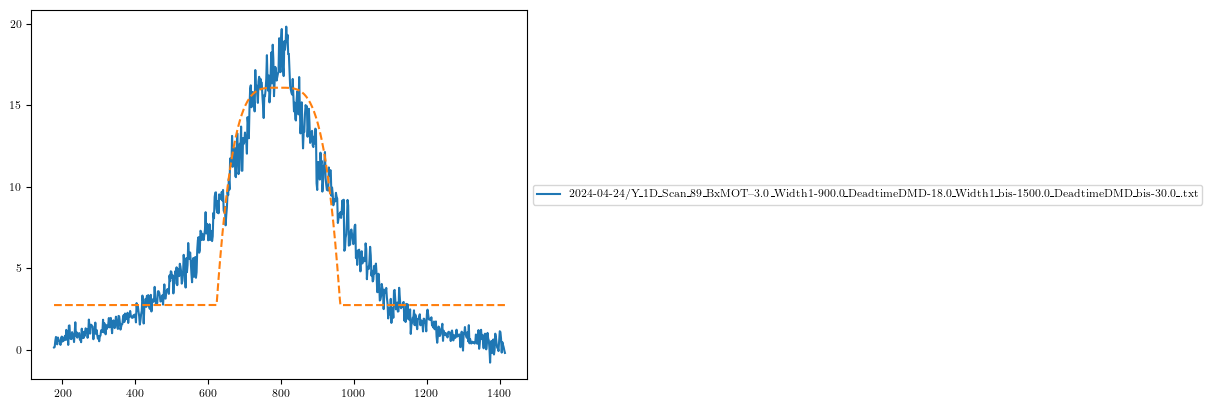

chi carre =  1.6869715583444644
5.229958032751838e-162 -0.00011532988725821709
876.15
Taille bord 31.8599999999999


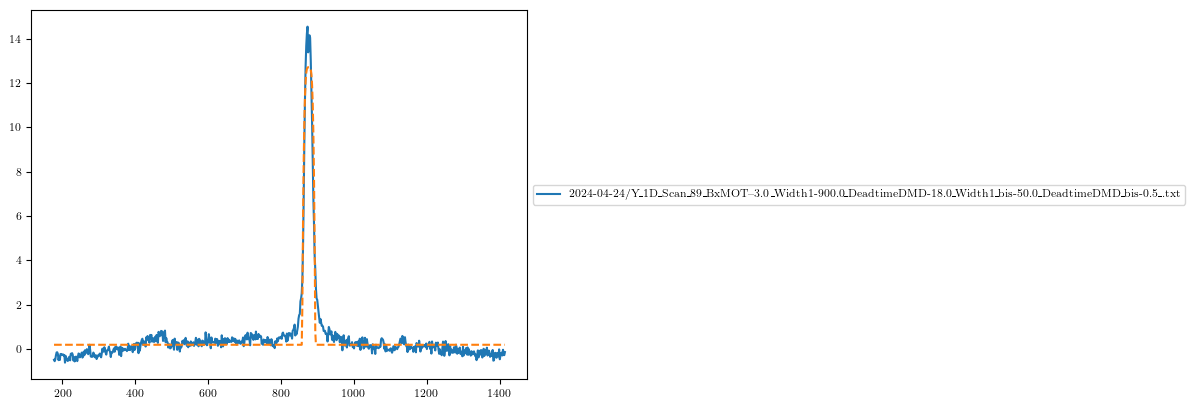

chi carre =  0.6303377329085692
8.282304876418223e-08 -5.280805534904014e-10
852.255
Taille bord 419.49


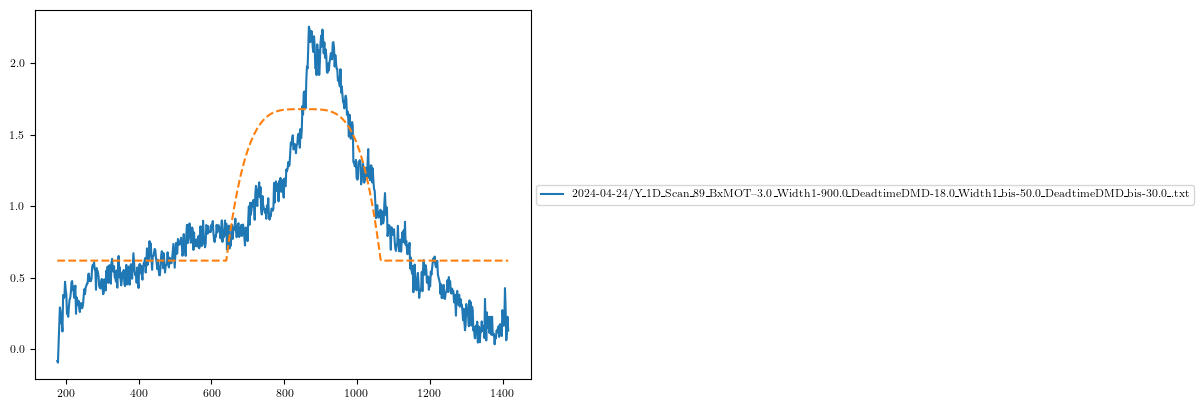

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


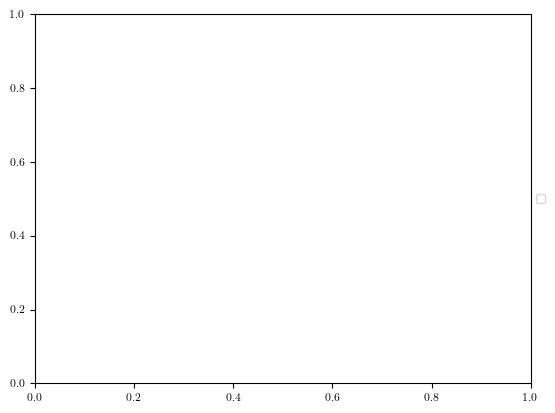

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


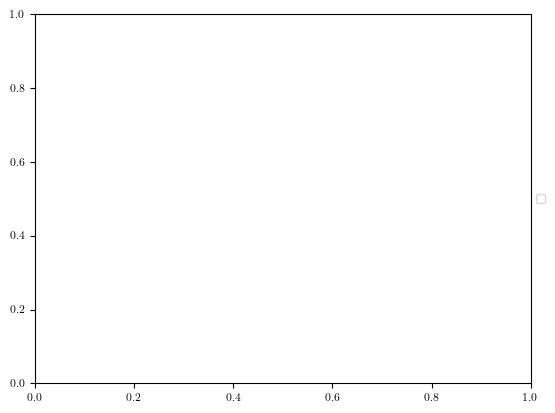

chi carre =  0.6303377329085692
8.282304876418223e-08 -5.280805534904014e-10
852.255
Taille bord 419.49


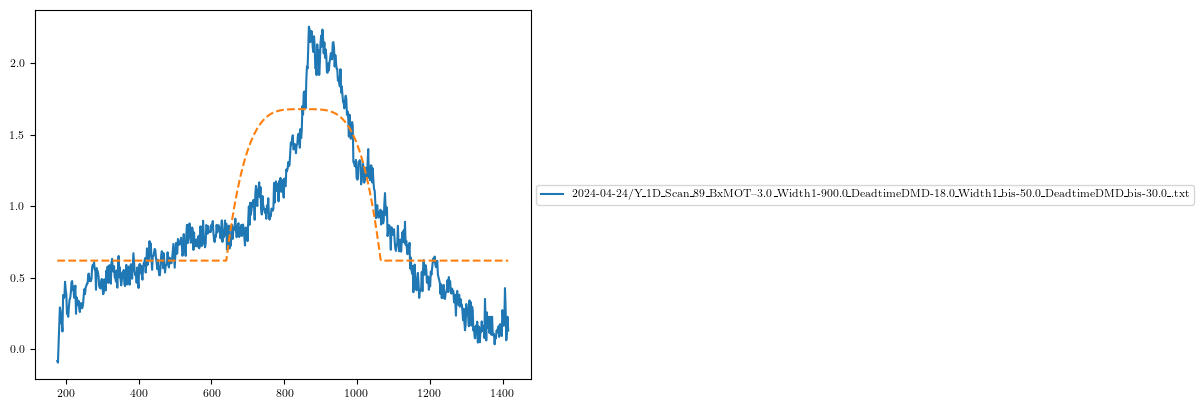

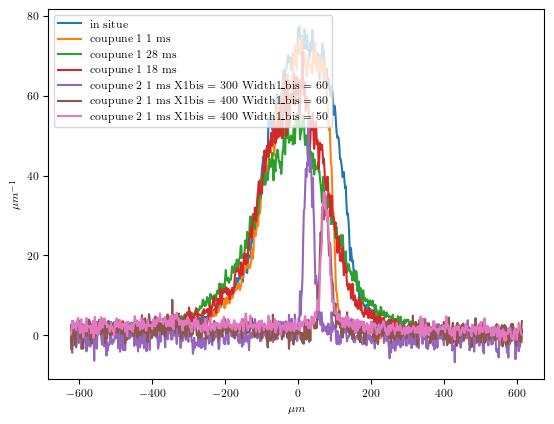

FileNotFoundError: 2024_04_24/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-0.0_Width1_bis-1500.0_BxMOT--3.0_.txt not found.

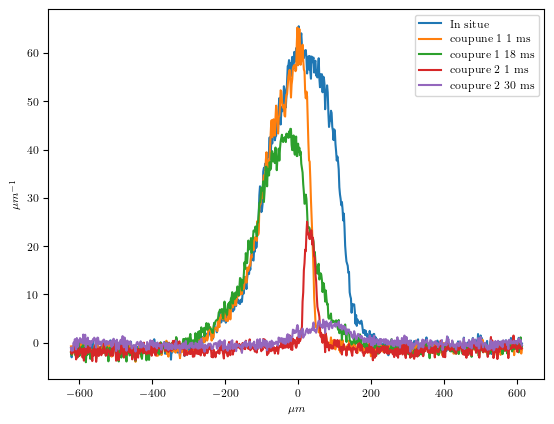

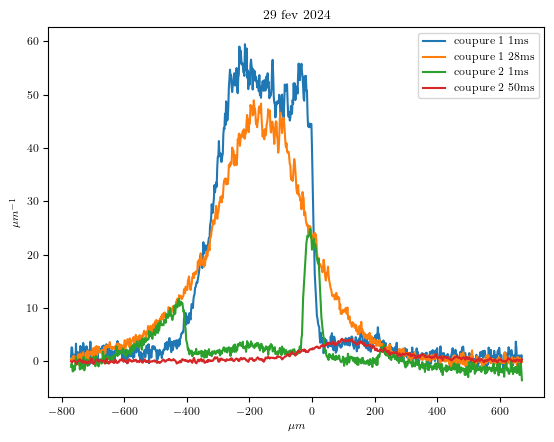

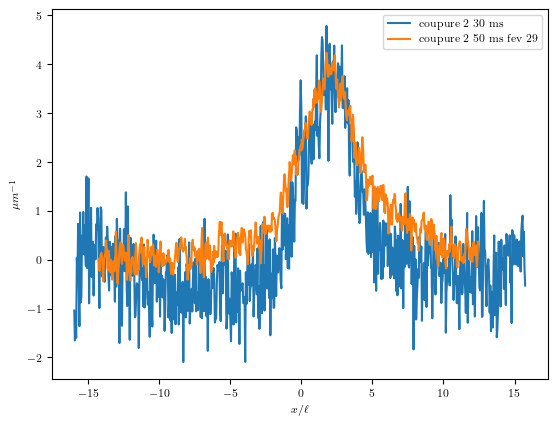

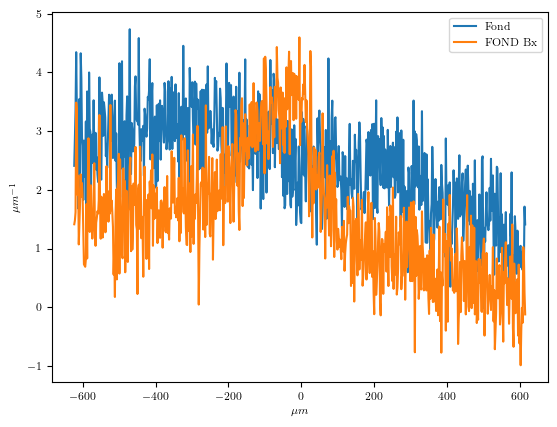

31.899999999999977


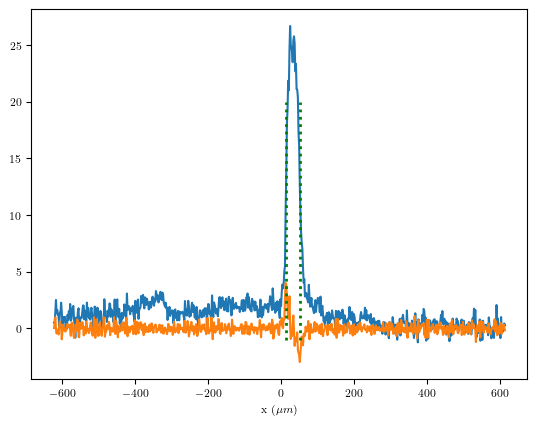

Taille bord 38.940000000000055
-802.7049999999999


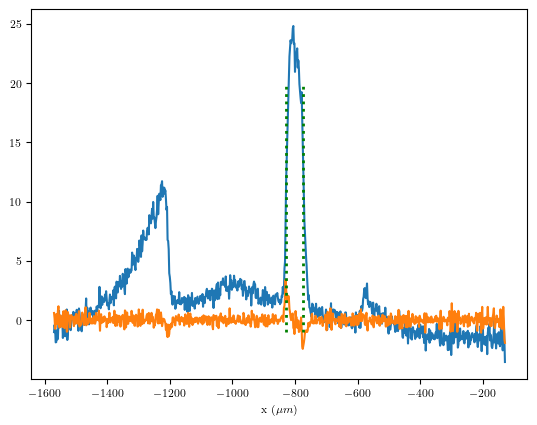

Taille bord 54.870000000000005
0.9090909090909091 0.9090909090909091
120.0


In [ ]:
%%time

##################
j_start = 1
g_exemple = 0
h_exemple = 0
N_at_min = 1000  # On enlève les images avec trop peu d'atomes (si not flag_photons)
N_at_max =np.inf #15000      # On enlève les images avec trop d'atomes
N_ph_min = -np.inf#-10000             # On enlève les images avec trop peu de photons (si flag_photons)
N_ph_max = np.inf #10000              # On enlève les images avec trop de photons 
N_ph_max_real = 400
N_scans_rm_end = 0     # Nombre de scans que l'on veut ne pas prendre en compte (si dérive par exemple)
lim_background = 250
sat_limite = 0.0#9e-2            # Saturation en dessous de laquelle on ne prends pas l'image 
excluded=0
excluded_ph=0
#------------------
date_rep = "2024_03_05"      # Là où on enregistre les fichiers si flag_save
param2_save = "2598.0"
#------------------
flag_plot_all =1
flag_plot_exemple=0
flag_param = 0
flag_offset= 0              # Pour remesurer l'offset (approximatif car photons présents)
flag_save = 0           # Pour sauver tous les params 1 mais un seul param 2 (sauf si save_all_params)
flag_save_all_params = 1    # Pour sauver tous les params 1 et tous les params 2
flag_background = 0         # On récupère les images sans atomes pour en extraire un background
flag_plot_GIF = 0
falg_save_GIF = 0
#------------------
flag_photons = 0            # si 1 on regarde les photons collectés, si 0 on mesure le nombre d'atomes
##################

N_ats_profils = {}
N_tots = {}
N_phs_profils = {}
N_ph_tots = {}
N_tots_all = np.array([])
N_ph_tots_all = np.array([])
background_array = np.array([])      # On récupère les images sans atomes pour en extraire un background

if 1 == 0 : 
#if flag_background:
    for i in range(len(scans)):                          # On itère sur tous les scans
        for j in range(j_start,len_scan[scans[i]]):      #j commence à 1 !! 
            mat = scipy.io.loadmat(dirordimanip[str(scans[i])]+lesfich[str(scans[i])][j-1])

            pic2double=np.double(mat['pic2']-offset)           # On charge les images brutes
            pic2double[pic2double<1]=1
            pic1double=np.double(mat['pic1']-offset)
            pic1double[pic1double<1]=1

            ### Rotation de l'image pour avoir la gravité dans la bonne direction + division des deux images
            pic =  np.rot90(np.log(pic2double/pic1double ))
            pic_diff = np.rot90(pic2double-pic1double)

            ### Mesure du background à retirer au calcul du nombre d'atomes
            background = np.mean(pic[background_selec[0,1]:background_selec[1,1],background_selec[0,0]:background_selec[1,0]])    

            ### calcul de la saturation I/I_sat
            aux=np.rot90(gain_ccd*(pic2double))       
            aux2=aux[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]    
            I = aux2*hbar*omega/(pixelsize**2 *pulselength)
            sat = I/I_sat
            sigma = sigma0/(1.+sat)

            ### Calcul du nombre d'atomes dans chaque pixel en prenant en compte I / Isat
            N_at = pixelsize**2/sigma \
                * (pic[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]-background)
            N_at = np.sum(N_at,axis = 0)   
            N_tot = np.sum(N_at)
    
            if ((N_tot <=lim_background) and (np.mean(sat)>sat_limite)):
                background_array = np.append(background_array, np.mean(pic[atoms_selec[0,1]:atoms_selec[1,1],\
                                                                           atoms_selec[0,0]:atoms_selec[1,0]]))
    background_mean = np.mean(background_array)
    print("Nombre d'images utilisées pour le background :", len(background_array))


#for g in range(len(data_param_set_2)):
#    param_2 = data_param_set_2[g]
#    N_tots[str(param_2)] = np.array([])
#    N_ph_tots[str(param_2)] = np.array([])

print ('la 1')

#for i in len(param_names) : globals()[f"params_{i}"] = np.array([])

#plt.rcParams["figure.figsize"] = (8,5)

#def recursive_iteration(n,current_index=0):
#    if current_index == n : # Condition d'arret de la récurence
#        for i in len(param_names) : print(globals()[f"params_{i}"])
#        return 
#    for globals()[f"h_{n}"] in range(len(data_param_sets[scan_number][param_names[n]])):
#        globals()[f"param_{n}"] = data_param_sets[scan_number][param_names[n]][globals()[f"h_{n}"]]
#        globals()[f"params_{n}"] = np.append(globals()[f"params_{n}"])
#        recursive_iteration(n,current_index+1)

print ('la 2')
if 1 == 0 : 
#for h in range(len(data_param_set_1)):                     # On choisit le paramètre d'étude
    param_1 = data_param_set_1[h]
    params_1 = np.append(params_1,param_1)
    
    for g in range(len(data_param_set_2)):
        param_2 = data_param_set_2[g]
        params_2 = np.append(params_2,param_2)
        
        for f in range(len(data_param_set_3)):
            param_3 = data_param_set_3[f]
            params_3 = np.append(params_3,param_3)
            
            for e in range(len(data_param_set_4)):
                param_4 = data_param_set_4[e]
                params_4 = np.append(params_4,param_4)

                N_at_set = []
                N_tot_set = []
                N_ph_set = []
                N_ph_tot_set = []

                for i in range(len(scans)):                          # Pour chaque scan
                    for j in range(j_start,len_scan[scans[i]]+1-N_scans_rm_end):      # Sur toutes les réalisations d'un scan
                        if float(data_param_1[scans[i]][j]) == param_1 \
                        and float(data_param_2[scans[i]][j]) == param_2 \
                        and float(data_param_3[scans[i]][j]) == param_3 \
                        and float(data_param_4[scans[i]][j]) == param_4 : # Si les paramètres coïncident
                            
                            mat = scipy.io.loadmat(dirordimanip[str(scans[i])]+lesfich[str(scans[i])][j-1])
                            ### Choix de l'offset 
                            if flag_offset:
                                calcul_offset =np.rot90((np.double(mat['pic2']))) 
                                calcul_offset =calcul_offset[background_selec[0,1]:background_selec[1,1],background_selec[0,0]:background_selec[1,0]]  
                                new_offset = np.mean(calcul_offset)
                                pic2double=np.double(mat['pic2'] - new_offset)
                                pic2double[pic2double_new_offset<1]=1
                                pic1double=np.double(mat['pic1'] - new_offset)
                                pic1double[pic1double_new_offset<1]=1
                            else:
                                pic2double=np.double(mat['pic2']-offset)
                                pic2double[pic2double<1]=1
                                pic1double=np.double(mat['pic1']-offset)
                                pic1double[pic1double<1]=1

                            ### Rotation de l'image pour avoir la gravité dans la bonne direction + division des deux images
                            pic =  np.rot90( np.log(  pic2double/pic1double ))

                            aux=np.rot90(gain_ccd*(pic2double))   
                            aux2=aux[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]  
                            I = aux2*hbar*omega/(pixelsize**2 *pulselength)
                            sat = I/I_sat
                            sigma = sigma0/(1.+sat)

                            if flag_background:
                                ### Calcul du nombre d'atomes dans chaque pixel en prenant en compte I / Isat
                                N_at = pixelsize**2/sigma \
                                    * (pic[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]-background_mean)
                            else:
                                ### Mesure du background à retirer au calcul du nombre d'atomes
                                background = np.mean(pic[background_selec[0,1]:background_selec[1,1],background_selec[0,0]:background_selec[1,0]])    
                                N_at = pixelsize**2/sigma \
                                    * (pic[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]-background)

                            N_at = np.sum(N_at,axis = 0)    # On somme sur la direction transverse      
                            N_tot = np.sum(N_at)

                            if N_tot<N_at_max and N_tot>N_at_min and np.mean(sat)>sat_limite:
                                N_tot_set.append(N_tot)
                                N_at_set.append(N_at)
                                N_tots_all = np.append(N_tots_all, N_tot)
                            else:
                                excluded += 1

                            if flag_photons:
                                Int_photons = np.rot90(gain_ccd*(pic1double-pic2double))[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]  
                                N_photons = np.sum(Int_photons, axis = 0)
                                N_photons_tot = np.sum(np.array(N_photons))
                                while (np.min(N_photons)<N_ph_min):
                                    N_photons[np.argmin(N_photons)] = 0
                                while (np.max(N_photons)>N_ph_max):
                                    N_photons[np.argmax(N_photons)] = 0
#                                 if (N_photons_tot>0 and np.max(N_photons)>N_ph_max_real):
                                if (np.max(N_photons)>N_ph_max_real):
                                    N_ph_set.append(N_photons)
                                    N_ph_tot_set.append(np.sum(np.array(N_photons)))
                                    N_ph_tots_all = np.append(N_ph_tots_all, np.sum(np.array(N_photons)))
                                else:
                                    excluded_ph += 1 
                                X_pixels = np.array([i for i in range(N_photons.shape[0])])


                            if flag_param:
                                if param_2 == 50:
                                    print(np.mean(sat))
                                    print(N_tot)
                                    plt.rcParams["figure.figsize"] = (8,5)
                                    plt.rcParams["figure.figsize"] = (8,5)
                                    plt.figure()
                                    plt.pcolormesh(pic, vmin = -0.1, vmax = 0.8, cmap = "jet")
                                    plt.xticks(fontsize =14)
                                    plt.yticks(fontsize = 14)
                                    plt.colorbar()
                                    plt.show()
                                    plt.rcParams["figure.figsize"] = (15,5)
                                    plt.rcParams["figure.figsize"] = (15,5)

                
                if math.isnan(np.mean(N_tot_set)):
                    N_ats_profils[str(param_1)+"_"+str(param_2)+"_"+str(param_3)+"_"+str(param_4)] = \
                    np.zeros(N_points_long)
                    N_tots[str(param_2)] = np.append(N_tots[str(param_2)],0)
                    if not flag_photons:
                        print("___________________________")
                        print("\nATTENTION, pas de donnée valable pour le jeu de paramètre :")
                        print(param_scan_1+" = "+str(float(param_1))+" - "+param_scan_2+" = "+str(float(param_2))+" - "+param_scan_3+" = "+str(float(param_3))+" - "+param_scan_4+" = "+str(float(param_4)))
                        print("___________________________")   
                else:  
                    N_ats_profils[str(param_1)+"_"+str(param_2)+"_"+str(param_3)+"_"+str(param_4)] = \
                    np.nanmean(np.array(N_at_set),axis = 0)
                    N_tots[str(param_2)] = np.append(N_tots[str(param_2)],np.mean(N_tot_set))
                    if not flag_photons:
                        print("___________________________")
                        print("\nNombre d'atomes : ", int(np.mean(N_tot_set)))
                        print("Ecart type : ", int(np.std(N_tot_set)))
                        print("Nombre de scans moyennés:", len(N_tot_set))
                        print("___________________________")    

                if flag_photons:
                    N_phs_profils[str(param_1)+"_"+str(param_2)+"_"+str(param_3)+"_"+str(param_4)] = \
                    np.nanmean(np.array(N_ph_set),axis = 0)
                    N_ph_tots[str(param_2)] = np.append(N_ph_tots[str(param_2)],np.mean(N_ph_tot_set))

                ### On affiche les différentes zones de sélection
                if flag_plot_all:
                    if not flag_photons:
                        if not all(N_ats_profils[str(param_1)+"_"+str(param_2)+"_"+str(param_3)+"_"+str(param_4)] == np.zeros(N_points_long)):
                            plt.rcParams["figure.figsize"] = (15,3)
                            plt.rcParams["figure.figsize"] = (15,3)
                            X_pixels = np.array([i for i in range(len(N_at))])
                            plt.figure(2)
                            plt.subplot(1,2,1)
                            plt.grid(visible = None)
                            plt.title('Image divisée')
                            plt.pcolormesh(pic, vmin = -0.05, vmax = 0.45, cmap = "jet")
                            plt.colorbar()
                            # Sélection du nuage d'atomes
                            plt.plot([atoms_selec[0,0],atoms_selec[1,0]] , [atoms_selec[0,1], atoms_selec[0,1] ],'-',color='red',linewidth=1)
                            plt.plot([atoms_selec[0,0],atoms_selec[0,0]] , [atoms_selec[0,1], atoms_selec[1,1] ],'-',color='red',linewidth=1)
                            plt.plot([atoms_selec[0,0],atoms_selec[1,0]] , [atoms_selec[1,1], atoms_selec[1,1] ],'-',color='red',linewidth=1)
                            plt.plot([atoms_selec[1,0],atoms_selec[1,0]] , [atoms_selec[1,1], atoms_selec[0,1] ],'-',color='red',linewidth=1)
                            # Sélection du background
                            plt.plot([background_selec[0,0],background_selec[1,0]] , [background_selec[0,1], background_selec[0,1] ],'-',color='white',linewidth=1)
                            plt.plot([background_selec[0,0],background_selec[0,0]] , [background_selec[0,1], background_selec[1,1] ],'-',color='white',linewidth=1)
                            plt.plot([background_selec[0,0],background_selec[1,0]] , [background_selec[1,1], background_selec[1,1] ],'-',color='white',linewidth=1)
                            plt.plot([background_selec[1,0],background_selec[1,0]] , [background_selec[1,1], background_selec[0,1] ],'-',color='white',linewidth=1)    

                            plt.subplot(1,2,2)
                            plt.title("Atomes - "+param_scan_1+" = "+str(float(param_1))+" - "+param_scan_2+" = "+str(float(param_2))+" - "+param_scan_3+" = "+str(float(param_3))+" - "+param_scan_4+" = "+str(float(param_4)))
                            plt.plot(1e6*X_pixels*pixelsize,\
                                     N_ats_profils[str(param_1)+"_"+str(param_2)+"_"+str(param_3)+"_"+str(param_4)] /(pixelsize*1e6*0.75), color = 'teal')
                            #plt.xlim(400,1000)
                            plt.xticks(fontsize = 14)
                            plt.yticks(fontsize = 14)
                            plt.show() 

                    plt.rcParams["figure.figsize"] = (15,3)
                    plt.rcParams["figure.figsize"] = (15,3)

                    if flag_photons:
                        plt.figure()
                        plt.subplot(1,2,1)
                        plt.grid(visible = None)
#                         plt.title('Image divisée')
                        plt.pcolormesh(np.rot90(pic2double-pic1double), vmin = -300, vmax =300, cmap = "viridis")
                        plt.colorbar()
                        plt.xticks(fontsize = 16)
                        plt.yticks(fontsize = 16)
                        plt.xlabel("Pixels", fontsize = 16)
                        plt.ylabel("Pixels", fontsize = 16)
                        # Sélection du nuage d'atomes
                        plt.plot([atoms_selec[0,0],atoms_selec[1,0]] , [atoms_selec[0,1], atoms_selec[0,1] ],'-',color='red',linewidth=1)
                        plt.plot([atoms_selec[0,0],atoms_selec[0,0]] , [atoms_selec[0,1], atoms_selec[1,1] ],'-',color='red',linewidth=1)
                        plt.plot([atoms_selec[0,0],atoms_selec[1,0]] , [atoms_selec[1,1], atoms_selec[1,1] ],'-',color='red',linewidth=1)
                        plt.plot([atoms_selec[1,0],atoms_selec[1,0]] , [atoms_selec[1,1], atoms_selec[0,1] ],'-',color='red',linewidth=1)
#                         # Sélection du background
#                         plt.plot([background_selec[0,0],background_selec[1,0]] , [background_selec[0,1], background_selec[0,1] ],'-',color='white',linewidth=1)
#                         plt.plot([background_selec[0,0],background_selec[0,0]] , [background_selec[0,1], background_selec[1,1] ],'-',color='white',linewidth=1)
#                         plt.plot([background_selec[0,0],background_selec[1,0]] , [background_selec[1,1], background_selec[1,1] ],'-',color='white',linewidth=1)
#                         plt.plot([background_selec[1,0],background_selec[1,0]] , [background_selec[1,1], background_selec[0,1] ],'-',color='white',linewidth=1)    
                        plt.subplot(1,2,2)
#                         plt.title("Photons - "+param_scan_1+" = "+str(float(param_1))+" - "+param_scan_2+" = "+str(float(param_2))+" - "+param_scan_3+" = "+str(float(param_3))+" - "+param_scan_4+" = "+str(float(param_4)))
                        plt.plot(np.nanmean(np.array(N_ph_set),axis = 0), color = 'goldenrod')
                        plt.xticks(fontsize = 16)
                        plt.yticks(fontsize = 16)
                        plt.xlabel("Pixels", fontsize = 16)
                        plt.ylabel("$\\langle N_1 - N_2 \\rangle$", fontsize = 16)
#                         plt.savefig("GHD_Code_Jerôme/2023_12_12/Parshiftime_3_mus.png", dpi = 500,bbox_inches='tight')
                        plt.show() 

                if flag_plot_exemple:
                    plt.rcParams["figure.figsize"] = (15,3)
                    plt.rcParams["figure.figsize"] = (15,3)
                    X_pixels = np.array([i for i in range(len(N_at))])
                    if g == g_exemple and h == h_exemple:
                        plt.figure(2)
                        plt.subplot(1,2,1)
                        plt.grid(visible = None)
                        plt.title('Image divisée')
                        plt.pcolormesh(pic, vmin = -0.05, vmax = 0.6, cmap = "jet")
                        plt.colorbar()
                        # Sélection du nuage d'atomes
                        plt.plot([atoms_selec[0,0],atoms_selec[1,0]] , [atoms_selec[0,1], atoms_selec[0,1] ],'-',color='red',linewidth=1)
                        plt.plot([atoms_selec[0,0],atoms_selec[0,0]] , [atoms_selec[0,1], atoms_selec[1,1] ],'-',color='red',linewidth=1)
                        plt.plot([atoms_selec[0,0],atoms_selec[1,0]] , [atoms_selec[1,1], atoms_selec[1,1] ],'-',color='red',linewidth=1)
                        plt.plot([atoms_selec[1,0],atoms_selec[1,0]] , [atoms_selec[1,1], atoms_selec[0,1] ],'-',color='red',linewidth=1)
                        # Sélection du background
                        plt.plot([background_selec[0,0],background_selec[1,0]] , [background_selec[0,1], background_selec[0,1] ],'-',color='white',linewidth=1)
                        plt.plot([background_selec[0,0],background_selec[0,0]] , [background_selec[0,1], background_selec[1,1] ],'-',color='white',linewidth=1)
                        plt.plot([background_selec[0,0],background_selec[1,0]] , [background_selec[1,1], background_selec[1,1] ],'-',color='white',linewidth=1)
                        plt.plot([background_selec[1,0],background_selec[1,0]] , [background_selec[1,1], background_selec[0,1] ],'-',color='white',linewidth=1)    

                        plt.subplot(1,2,2)
                        plt.title("Atomes - "+param_scan_1+" = "+str(float(param_1))+" - "+param_scan_2+" = "+str(float(param_2))+" - "+param_scan_3+" = "+str(float(param_3))+" - "+param_scan_4+" = "+str(float(param_4)))
                        plt.plot(1e6*X_pixels*pixelsize,\
                                 N_ats_profils[str(param_1)+"_"+str(param_2)+"_"+str(param_3)+"_"+str(param_4)] /(pixelsize*1e6*0.75), color = 'teal')
                        plt.xticks(fontsize = 14)
                        plt.yticks(fontsize = 14)

                        plt.show() 
                    plt.rcParams["figure.figsize"] = (6,5)
                    plt.rcParams["figure.figsize"] = (6,5)

                if flag_plot_GIF:
                    plt.rcParams["figure.figsize"] = (6,5)
                    plt.rcParams["figure.figsize"] = (6,5)
                    plt.figure(2)
                    plt.grid(visible = None)
                    plt.title('Image divisée')
                    plt.pcolormesh(pic, vmin = -0.05, vmax = 0.45, cmap = "jet")
                    plt.text(50.0, 220, "Expansion time $=$ "+str(float(param_2))+" $ms$",fontsize=20,color = 'white', fontweight = 'extra bold',backgroundcolor = 'blue')
        #             plt.text(50.0, 220, "Expansion time $= 0 ms$",fontsize=20,color = 'white', fontweight = 'extra bold',backgroundcolor = 'blue')
                    plt.colorbar()
                    if flag_plot_GIF:
                        plt.savefig("GIF_2023_06_26/Images_"+str(g+1).zfill(2)+".png",format =  'png', bbox_inches='tight', dpi = 300)
        #             plt.savefig("GIF_2023_06_26/Images_00.png",format =  'png', bbox_inches='tight', dpi = 300)
                    plt.show() 

print('la 3')
if flag_save:
    print('-------- Sauvegarde ---------')
    for text in N_ats_profils.keys():
        for i in list(set(params_1)):
            param_save = str(i)
            for j in list(set(params_2)):
                param_save_2 = str(j)
                for k in list(set(params_3)):
                    param_save_3 = str(k)
                    for l in list(set(params_4)):
                        param_save_4 = str(l)
                        if text == param_save+"_"+param_save_2+"_"+param_save_3+"_"+param_save_4:
                            if not flag_photons:
                                if not all(N_ats_profils[text] == np.zeros(N_points_long)):
                                    print('//Save Natomes//')
                                    np.savetxt("GHD_Code_Jerôme/"+str(date_rep)+"/X_1D_Scan_"+str(scans[0])+"_"+str(param_save)+"_"+str(param_save_2)+"_"+str(param_save_3)+"_"+str(param_save_4)+".txt",\
                                               1e6*X_pixels*pixelsize)
                                    np.savetxt("GHD_Code_Jerôme/"+str(date_rep)+"/Y_1D_Scan_"+str(scans[0])+"_"+str(param_save)+"_"+str(param_save_2)+"_"+str(param_save_3)+"_"+str(param_save_4)+".txt",\
                                               N_ats_profils[text]/(pixelsize*1e6*0.75))
                            else:
                                print('//Save Nphotons//')
                                np.savetxt("GHD_Code_Jerôme/"+str(date_rep)+"/X_1D_ph_Scan_"+str(scans[0])+"_"+str(param_save)+"_"+str(param_save_2)+"_"+str(param_save_3)+"_"+str(param_save_4)+".txt",\
                                           1e6*X_pixels*pixelsize)
                                np.savetxt("GHD_Code_Jerôme/"+str(date_rep)+"/Y_1D_ph_Scan_"+str(scans[0])+"_"+str(param_save)+"_"+str(param_save_2)+"_"+str(param_save_3)+"_"+str(param_save_4)+".txt",\
                                           N_phs_profils[text]/(pixelsize*1e6*0.75))

                        


# On choisis des données sans frange à la main 

In [ ]:
def liste_choix_image(*params):
    Liste, Retire = [], []
    test = 0 
    N_at_min, N_at_max, sat_limite = 1000, 20000, 0.09
    
    for i in range(len(scans)):
        Liste_Nat_tot = []
        for j in range(j_start, len_scan[scans[i]] + 1):
            match = True
            
            for k, param in enumerate(params):
                #print ( data_param[scans[i]][param_names[k]][j] , param )
                if float(data_param[scans[i]][param_names[k]][j]) != param:
                    match = False
                    break
            
            if match:
                mat = scipy.io.loadmat(dirordimanip[str(scans[i])] + lesfich[str(scans[i])][j - 1])
                pic2double = np.double(mat['pic2'] - offset)
                pic2double[pic2double < 1] = 1
                pic1double = np.double(mat['pic1'] - offset)
                pic1double[pic1double < 1] = 1

                # Rotation de l'image pour avoir la gravité dans la bonne direction + division des deux images
                pic = np.rot90(np.log(pic2double / pic1double))
                
                aux = np.rot90(gain_ccd * (pic2double))
                aux2 = aux[atoms_selec[0, 1]:atoms_selec[1, 1], atoms_selec[0, 0]:atoms_selec[1, 0]]
                I = aux2 * hbar * omega / (pixelsize ** 2 * pulselength)
                sat = I / I_sat
                sigma = sigma0 / (1. + sat)
                    
                background = np.mean(pic[background_selec[0,1]:background_selec[1,1],background_selec[0,0]:background_selec[1,0]])    
                 
                N_at = pixelsize**2/sigma \
                    * (pic[atoms_selec[0,1]:atoms_selec[1,1],atoms_selec[0,0]:atoms_selec[1,0]]-background)
                    
                N_at = np.sum(N_at, axis=0)
                N_tot = np.sum(N_at)
                
                Liste_Nat_tot.append(N_tot)
                
                aux2 = aux
                I = aux2 * hbar * omega / (pixelsize ** 2 * pulselength)
                sat1 = I / I_sat
                sigma = sigma0 / (1. + sat1)
                N_at = pixelsize**2/sigma \
                    * (pic-background)
                
                if N_tot < N_at_max and N_tot > N_at_min and np.mean(sat) > sat_limite:
                    Liste.append(N_at)
                    #Liste_Nat_tot.append(N_tot)
                    if test:
                        print(float(data_param[scans[i]]["DeadtimeDMD"][j]), float(data_param[scans[i]]["BxMOT"][j]))
                        print(' N_at_min , N_at_max , sat_limite , ', N_at_min, N_at_max, sat_limite)
                        print('garde N_tot  , np.mean(sat) = ', N_tot, np.mean(sat))
                        plt.pcolormesh(pic, vmin=-0.05, vmax=0.6, cmap="jet")
                        plt.colorbar()
                        plt.show()
                else:
                    Retire.append(N_at)
                    if test:
                        print(float(data_param[scans[i]]["DeadtimeDMD"][j]), float(data_param[scans[i]]["BxMOT"][j]))
                        print('rejet N_tot , np.mean(sat) = ', N_tot, np.mean(sat))
                        plt.pcolormesh(pic, vmin=-0.05, vmax=0.6, cmap="jet")
                        plt.colorbar()
                        plt.show()
        if test == 1:
            mean_N_at_tot, std_N_at_tot = np.mean(np.array(Liste_Nat_tot)), np.std(np.array(Liste_Nat_tot))
            print('mean , ecart type N_at  : ', mean_N_at_tot, std_N_at_tot)

            # Créez une figure
            plt.figure()

            # Tracer les points
            plt.plot(Liste_Nat_tot, '.', color='red', label='Points')

            # Lignes horizontales avec différentes couleurs et styles
            plt.axhline(N_at_min, color='blue', linestyle='--', label='N_at_min')
            plt.axhline(N_at_max, color='green', linestyle='-.', label='N_at_max')
            plt.axhline(mean_N_at_tot, color='orange', linestyle='-', label='Mean')
            plt.axhline(mean_N_at_tot + std_N_at_tot, color='purple', linestyle=':', label='Mean + Std')
            plt.axhline(mean_N_at_tot - std_N_at_tot, color='brown', linestyle='--', label='Mean - Std')

            # Remplir la zone entre mean + std et mean - std
            plt.fill_between(range(len(Liste_Nat_tot)), mean_N_at_tot - std_N_at_tot, mean_N_at_tot + std_N_at_tot, color='gray', alpha=0.5, label='Mean +/- Std')

            # Afficher la légende
            plt.legend()

            # Afficher la figure
            plt.show()
    return Liste, Retire

